1. 정수인코딩

In [1]:
# 텍스트를 숫자로 바꾸는 기법
text = '''모처럼 전국에 비가 내리고 있습니다.
        대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
        비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우
        산 챙기는 게 더 좋습니다.
        특히 제주와 남해안에서 비바람이 강합니다.
        '''

In [2]:
from nltk.tokenize import sent_tokenize
# 문장 토큰화
text = sent_tokenize(text)
print(text)

['모처럼 전국에 비가 내리고 있습니다.', '대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.', '비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우\n        산 챙기는 게 더 좋습니다.', '특히 제주와 남해안에서 비바람이 강합니다.']


In [3]:
# 명사만 추출하는 방법
from konlpy.tag import Okt
okt = Okt()
text2 = []
for txt in text:
    t = okt.nouns(txt)
    text2.append(t)

text2

[['모처럼', '전국', '비'],
 ['대부분', '밤', '계속', '때문', '종일', '우산'],
 ['비', '양도', '바람', '불기', '때문', '우산', '산', '게', '더'],
 ['제주', '남해안', '비바람']]

In [4]:
# 명사와 형용사를 추출하는 방법
from konlpy.tag import Okt
okt = Okt()
text2 = []
for txt in text:
    morph = okt.pos(txt)
    text2.append(morph)

text3 = []
for text in text2:
    line=[]
    for word, tag in text:
        if tag in ['Noun','Adjective']:
            line.append(word)
    text3.append(line)
    
print(text3)

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '산', '게', '더', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [5]:
vocab = {}
sentences = []
stop_words = ['더', '게']
for txt in text3:
    result = []
    for word in txt:
        if word not in stop_words: # 불용어가 아니면
            result.append(word)
            if word not in vocab: # 새로운 단어이면
                vocab[word] = 0 # 출현횟수 0으로
            vocab[word] += 1 # 출현횟수 증가
    sentences.append(result)
print(sentences)

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '산', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [6]:
# 단어:출현빈도
print(vocab)

{'모처럼': 1, '전국': 1, '비': 2, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '때문': 2, '종일': 1, '우산': 2, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '산': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1}


In [7]:
print(vocab["우산"]) # 단어의 빈도수 출력

2


In [8]:
# 단어에 일련번호 부여
word_to_index = {}
i=0
for word in vocab :
    if vocab[word] > 1 : # 빈도수가 1보다 큰 단어들만 추가
        i=i+1
        word_to_index[word] = i # 단어에 번호를 매김
print(word_to_index)

{'비': 1, '때문': 2, '우산': 3}


In [9]:
# Out-Of-Vocabulary 단어 집합에 없는 단어
# 출현빈도수가 낮은 단어들은 word_to_index에 없으므로
# word_to_index에 OOV라는 단어를 추가하고 단어 집합에 없는 단어들은 OOV로 처리
word_to_index['OOV'] = len(word_to_index) + 1
encoded = []
for s in sentences: # 문장들을 반복
    temp = []
    for w in s: # 문장의 단어들을 반복
        try:
            # 단어의 고유번호를 리스트에 추가
            temp.append(word_to_index[w])
        except:
            # 존재하지 않는 단어는 OOV의 인덱스를 추가
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[4, 4, 1, 4], [4, 4, 4, 2, 4, 3, 4], [1, 4, 4, 4, 4, 4, 2, 4, 3, 4, 4], [4, 4, 4, 4]]


In [10]:
import numpy as np
#2차원 데이터를 1차원으로 바꾸고
words = np.hstack(sentences)
print(words)

['모처럼' '전국' '비' '있습니다' '대부분' '밤' '계속' '때문' '종일' '우산' '필요하겠는데요' '비' '양도'
 '많고' '바람' '강하게' '불기' '때문' '작은' '우산' '산' '좋습니다' '제주' '남해안' '비바람' '강합니다']


In [11]:
from collections import Counter
vocab = Counter(words) # 단어의 출현빈도를 쉽게 계산하는 클래스
print(vocab)

Counter({'비': 2, '때문': 2, '우산': 2, '모처럼': 1, '전국': 1, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '종일': 1, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '산': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1})


In [12]:
print(vocab["우산"]) # 단어의 빈도수

2


In [13]:
vocab_size = 5
# 출현빈도가 높은 상위 5개의 단어
vocab = vocab.most_common(vocab_size)
vocab

[('비', 2), ('때문', 2), ('우산', 2), ('모처럼', 1), ('전국', 1)]

In [14]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i+1
    word_to_index[word] = i
print(word_to_index)

{'비': 1, '때문': 2, '우산': 3, '모처럼': 4, '전국': 5}


2. 원핫인코딩

In [15]:
# 정수인코딩의 단점 : 단어의 순서가 없음
# 원핫인코딩 : 단어의 순서에 맞게 배열
from konlpy.tag import Okt
okt=Okt()
# 토근화(형태소 분석)
token=okt.morphs("나는 학교에 간다 나는 집에 간다")
print(token)

['나', '는', '학교', '에', '간다', '나', '는', '집', '에', '간다']


In [16]:
# 중복된 단어는 제외하고 단어를 key로 고유한 숫자 인덱스 부여
word2index={}
for idx,voca in enumerate(token):
    if voca not in word2index.keys():
        word2index[voca]=len(word2index)
print(word2index)

{'나': 0, '는': 1, '학교': 2, '에': 3, '간다': 4, '집': 5}


In [18]:
# 원핫인코딩 함수
def one_hot_encoding(word, word2index):
    # 전체 단어 갯수만큼 0으로 채운 리스트
    one_hot_vector = [0]*(len(word2index))
    # 해당하는 단어의 인덱스를 찾아
    index = word2index[word]
    # 1로 설정(나머지는 0)
    one_hot_vector[index] = 1
    return one_hot_vector

key_list = word2index.keys()
print(key_list)
for key in key_list:
    print(key, one_hot_encoding(key,word2index))

dict_keys(['나', '는', '학교', '에', '간다', '집'])
나 [1, 0, 0, 0, 0, 0]
는 [0, 1, 0, 0, 0, 0]
학교 [0, 0, 1, 0, 0, 0]
에 [0, 0, 0, 1, 0, 0]
간다 [0, 0, 0, 0, 1, 0]
집 [0, 0, 0, 0, 0, 1]


In [19]:
# 케라스에서 지원하는 원핫인코딩 함수
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
text = "나는 학교에 간다 나는 집에 간다"
t = Tokenizer()

# 각 단어에 대한 정수 인코딩
t.fit_on_texts([text])
print(t.word_index)

{'나는': 1, '간다': 2, '학교에': 3, '집에': 4}


In [22]:
# 각 단어에 매핑된 숫자로 변환된 리스트
sub_text = "나는 집에 간다"
encoded = t.texts_to_sequences([sub_text])[0]
print(encoded)

[1, 4, 2]


In [23]:
# 원핫인코딩
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [ ]:
# 원핫인코딩의 단점:
# 단어 갯수가 많아지면 변수의 갯수가 많아지게 됨
# 메모리 활용의 비효율성: 변수가 100개 있다면 99개의 0과 1개의 0으로 구성됨
# 비슷한 단어들의 유사성을 표현하기 어려움
# 강아지 [0,1,1]와 개 [1,0,0] 이라면 비슷한 단어이지만 유사성을 찾기 어려움
# 유사성을 찾기 위한 방법으로 LSA, RNN, Word2Vec 등의 방법이 있음

3. BOW(Bag Of Words)

In [25]:
# Bag Of Words(BOW) : 단어의 등장 순서를 고려하지 않은 빈도수 기반의 텍스트 데이터의 수치화 방법
# 가방에 단어들을 넣으면 순서가 중요하지 않음
# 각 단어에 고유한 인덱스를 부여하고
# 각 인덱스의 위치에 단어의 출현 횟수를 저장

from konlpy.tag import Okt
import re
okt = Okt()
token = re.sub("[.!#~]", "", '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')

# 형태소 분석
token = okt.morphs(token)
word2index = {} # 단어 사전(단어와 숫자 인덱스)
bow = [] # 단어 가방(단어와 출현 횟수)
for voca in token:
    # 사전에 없는 단어 추가
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
        # 단어의 인덱스와 출현횟수(기본값 = 1)
        bow.insert(len(word2index)-1, 1)
    else:
        # 재등장하는 단어의 인덱스
        index = word2index.get(voca)
        # 단어의 카운트 증가
        bow[index] = bow[index] + 1

print(word2index)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [26]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)
print(vector.transform(line).toarray()) # 단어 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['''모처럼 전국에 비가 내리고 있습니다.
            대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
            비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우
            산 챙기는 게 더 좋습니다. ''']
# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()
# 코퍼스로부터 각 단어의 빈도수 계산
# 단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())
# 만들어진 단어와 인덱스
print(vector.vocabulary_) # 단어사전

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [29]:
# 공백 단위로 나누어지므로 한국어의 경우 정확도가 떨어짐(비슷한 단어들도 별도로 집계됨)
f = open('../data/text/news1.txt')
corpus = f.read()
txt = okt.nouns(corpus)
txt2 = [' '.join(txt)]
txt2

['정부 코로나 방역 조치 대부분 해제 사실 상의 엔데믹 풍토병 감염병 선언 국내 첫 코로나 확 진자 발생 개월 만이 코로나 중앙 재난 안전 대책 본부 중 대본 윤석열 대통령 주재 회의 격리 의무 해제 내용 방역 완화 조치 발표 코로나 확산 감염병 위기 경보 단계 심각 경계 로 하향 조정 감염병 등급 급 급 내용 것 이 조치 병 의원 약국 감염 취약 시설 등 마스크 착용 의무 가능성 지난 첫 확 진자 발생 뒤 개월 대부분 방역 규제 것 정부 재난 관리 범 정부 차원 중 대본 것 보건복지부 중앙 사고 수습 본부 중수 질병 관리 청 중앙 방역 대책 본부 방 대본 총괄 변결 전망 다만 병원 등 감염 취약 시설 격리 의무 의견 격리 의무 확진 이후 격리 권고 방안 거론 본격 시행 달 말 다음 달 초 가능성 격리 의무 해제 고시 개정 행정 예고 규제 심사 등 절차 소요']

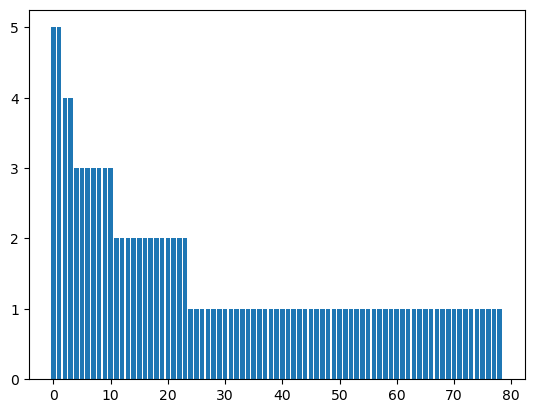

[('의무', 5), ('격리', 5), ('코로나', 4), ('방역', 4), ('정부', 3), ('중앙', 3), ('조치', 3), ('대본', 3), ('본부', 3), ('감염병', 3), ('해제', 3), ('대부분', 2), ('재난', 2), ('발생', 2), ('시설', 2), ('대책', 2), ('가능성', 2), ('진자', 2), ('내용', 2), ('감염', 2), ('규제', 2), ('취약', 2), ('개월', 2), ('관리', 2), ('착용', 1), ('완화', 1), ('위기', 1), ('윤석열', 1), ('의견', 1), ('의원', 1), ('이후', 1), ('확산', 1), ('전망', 1), ('하향', 1), ('절차', 1), ('차원', 1), ('조정', 1), ('풍토병', 1), ('주재', 1), ('중수', 1), ('지난', 1), ('예고', 1), ('질병', 1), ('총괄', 1), ('행정', 1), ('엔데믹', 1), ('수습', 1), ('안전', 1), ('개정', 1), ('거론', 1), ('경계', 1), ('경보', 1), ('고시', 1), ('국내', 1), ('권고', 1), ('다만', 1), ('다음', 1), ('단계', 1), ('대통령', 1), ('등급', 1), ('마스크', 1), ('만이', 1), ('발표', 1), ('방안', 1), ('변결', 1), ('병원', 1), ('보건복지부', 1), ('본격', 1), ('사고', 1), ('사실', 1), ('상의', 1), ('선언', 1), ('소요', 1), ('확진', 1), ('시행', 1), ('심각', 1), ('심사', 1), ('약국', 1), ('회의', 1)]


In [30]:
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(txt2)

# bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) # 카운트 내림차순 정렬
cnt = cnt[idx]

# X축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]
plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [31]:
#불용어 추가
vector = CountVectorizer(stop_words=['더'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[2 2 3 2 1 1 5 1 1 1 2 1 1 2 2 1 1 1 3 2 2 1 1 1 1 2 1 1 4 1 1 1 1 3 1 1
  1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 5 1 1 2 1 1 3 1 3 1 1 3 1 2 1 1 1 1 2 4
  1 1 3 1 1 1 1]]
{'정부': 58, '코로나': 71, '방역': 28, '조치': 60, '대부분': 19, '해제': 74, '사실': 35, '상의': 36, '엔데믹': 46, '풍토병': 72, '감염병': 2, '선언': 37, '국내': 11, '진자': 65, '발생': 25, '개월': 3, '만이': 24, '중앙': 63, '재난': 55, '안전': 44, '대책': 20, '본부': 33, '대본': 18, '윤석열': 50, '대통령': 21, '주재': 61, '회의': 78, '격리': 6, '의무': 52, '내용': 14, '완화': 48, '발표': 26, '확산': 76, '위기': 49, '경보': 8, '단계': 17, '심각': 42, '경계': 7, '하향': 73, '조정': 59, '등급': 22, '의원': 53, '약국': 45, '감염': 1, '취약': 70, '시설': 40, '마스크': 23, '착용': 68, '가능성': 0, '지난': 64, '규제': 13, '관리': 10, '차원': 67, '보건복지부': 31, '사고': 34, '수습': 39, '중수': 62, '질병': 66, '총괄': 69, '변결': 29, '전망': 56, '다만': 15, '병원': 30, '의견': 51, '확진': 77, '이후': 54, '권고': 12, '방안': 27, '거론': 5, '본격': 32, '시행': 41, '다음': 16, '고시': 9, '개정': 4, '행정': 75, '예고': 47, '심사': 43, '절차': 57, '소요': 38}
